## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 010B

## Part A - Load libraries

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
import numpy as np
import os
import pandas as pd
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

## Part B - Load Data

In [2]:
fileName = '../../Data/Cluster02.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Cluster02.csv


In [3]:
clusterdf= pd.read_csv(fileFullName,header=0)
print(clusterdf.shape)
print(clusterdf.columns)

(79, 3)
Index(['X', 'Y', 'T'], dtype='object')


In [4]:
X = np.array(clusterdf[['X', 'Y']], dtype='float64') 
y = np.array(clusterdf['T'], dtype='float64')

In [5]:
xdf=pd.DataFrame(X)
xdf.columns = (['X','Y'])
ydf=pd.DataFrame(y)
ydf.columns = (['T'])
Z=pd.concat([xdf, ydf], axis=1)
Z.to_csv('../../Data/Cluster03.csv',index=False)
Z.to_csv('../../Data/Cluster04.csv',index=False)

## Part C - Run Model

In [6]:
clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')

In [7]:
MLName = 'Linear Discriminant Analysis'

In [8]:
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
              solver='eigen', store_covariance=False, tol=0.0001)

In [9]:
def make_meshgrid(x, y, h=1):
    x_min, x_max = int(x.min()) - 2, int(x.max()) + 2
    y_min, y_max = int(y.min()) - 2, int(y.max()) + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [10]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

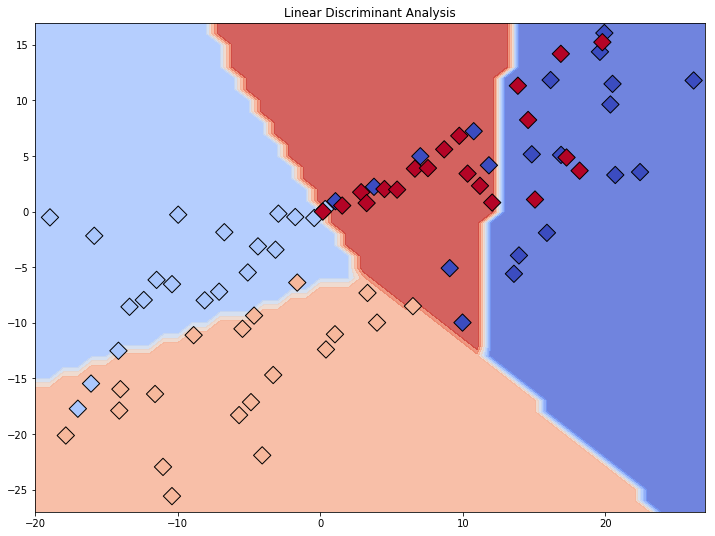

In [11]:
fig = plt.figure(1, figsize=(12, 9))
ax = fig.subplots(1, 1)
plt.title(MLName)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=150, edgecolors='k', marker='D')
plt.show()

In [12]:
p=[]
t=[]
for i in range(X.shape[0]):
    x=int(clf.predict(np.c_[X[i][0],X[i][1]]))
    p.append(x)
    t.append(y[i])

In [13]:
f1score1=f1_score(t, p, average='micro')
f1score2=f1_score(t, p, average='macro')

In [14]:
print('F1 Score (micro): %0.4f' % (f1score1))
print('F1 Score (macro): %0.4f' % (f1score2))

F1 Score (micro): 0.7468
F1 Score (macro): 0.7505


In [15]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


In [16]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [17]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-010B-01.jpg'])
fig.savefig(imagename, bbox_inches='tight')

In [18]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-06 19:31:32.249006
